In [1]:
import os
from tqdm import tqdm
import utils
import time  # Added for timing
import numpy as np 
import pandas as pd 
import plotting
from pathlib import Path
import pickle
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'cv2'

In [10]:
# prefered magic functions for jupyter notebook
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
def load_pickle_file(file_path: str):
    """
    Load a pickle file and return the deserialized object.

    Args:
        file_path (str): The path to the pickle file.

    Returns:
        object: The deserialized Python object.

    Raises:
        FileNotFoundError: If the file does not exist.
        ValueError: If the file is corrupted or not a valid pickle file.
    """
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"The file at '{file_path}' does not exist.")

    try:
        with open(file_path, 'rb') as file:
            return pickle.load(file)
    except (pickle.UnpicklingError, EOFError) as e:
        raise ValueError(f"Error loading pickle file: {e}")


In [12]:
DATA_PATH = Path("/data/")
pkl_files = list(DATA_PATH.glob("*/*/fit_motion_energy_pca.pkl"))

In [13]:
pca_dict = load_pickle_file(pkl_files[0])

In [14]:
pca_dict.keys()

dict_keys(['motion_zarr_path', 'pkl_file', 'npz_file', 'recrop', 'crop_region', 'use_cropped_frames', 'n_components', 'n_to_plot', 'standardize4PCA', 'chunk_size', 'start_index', 'mean', 'std', 'video_metadata', 'me_metadata', 'pca', 'pca_motion_energy', 'explained_variance', 'mean_me_frame', 'spatial_masks', 'top_results_path'])

In [15]:
pca_dict['me_metadata'].keys()

dict_keys(['video_path', 'fps', 'chunk_size', 'width', 'height', 'total_frames', 'video_info', 'camera_label', 'data_asset_id', 'data_asset_name', 'mouse_id', 'rig_id', 'session_type', 'project', 'timestamps', 'example_frame', 'frames_zarr_path', 'crop'])

In [20]:
class DictToObject:
    """
    A class to convert a dictionary into an object with attributes.
    """
    def __init__(self, dictionary):
        for key, value in dictionary.items():
            if isinstance(value, dict):
                setattr(self, key, DictToObject(value))  # Recursively convert nested dictionaries
            else:
                setattr(self, key, value)
    
    def __repr__(self):
        return f"{self.__dict__}"

In [26]:
pca_object = DictToObject(pca_dict)

In [27]:
pca_object.__repr__()

"{'motion_zarr_path': PosixPath('/data/736963_multiplane-ophys_736963_2024-07-29_09-00-58_Face_motion_energy/motion_energy_frames.zarr'), 'pkl_file': '/data/736963_multiplane-ophys_736963_2024-07-29_09-00-58_Face_motion_energy/motion_energy_dictionary.pkl', 'npz_file': '/data/736963_multiplane-ophys_736963_2024-07-29_09-00-58_Face_motion_energy/motion_energy_trace.npz', 'recrop': None, 'crop_region': None, 'use_cropped_frames': True, 'n_components': 100, 'n_to_plot': 3, 'standardize4PCA': False, 'chunk_size': 100, 'start_index': 0, 'mean': None, 'std': None, 'video_metadata': {'video_path': '/data/behavior-videos/1383148733_Face_20240729T090046.mp4', 'fps': 60, 'chunk_size': 100, 'width': 658, 'height': 492, 'total_frames': 222158, 'video_info': {'Recording Report Version': '1.0', 'Acquisition DateTime': '07/29/24 10:02:29', 'MVR Version': '1.1.7', 'CameraIndex': 'Camera 3', 'CameraLabel': 'Face', 'CameraID': 'DEV_000F315D38AC', 'FPS': 60.0024, 'CameraGain': 13, 'CustomInitialExposureT

In [28]:
pca_object['pca_motion_energy']

TypeError: 'DictToObject' object is not subscriptable

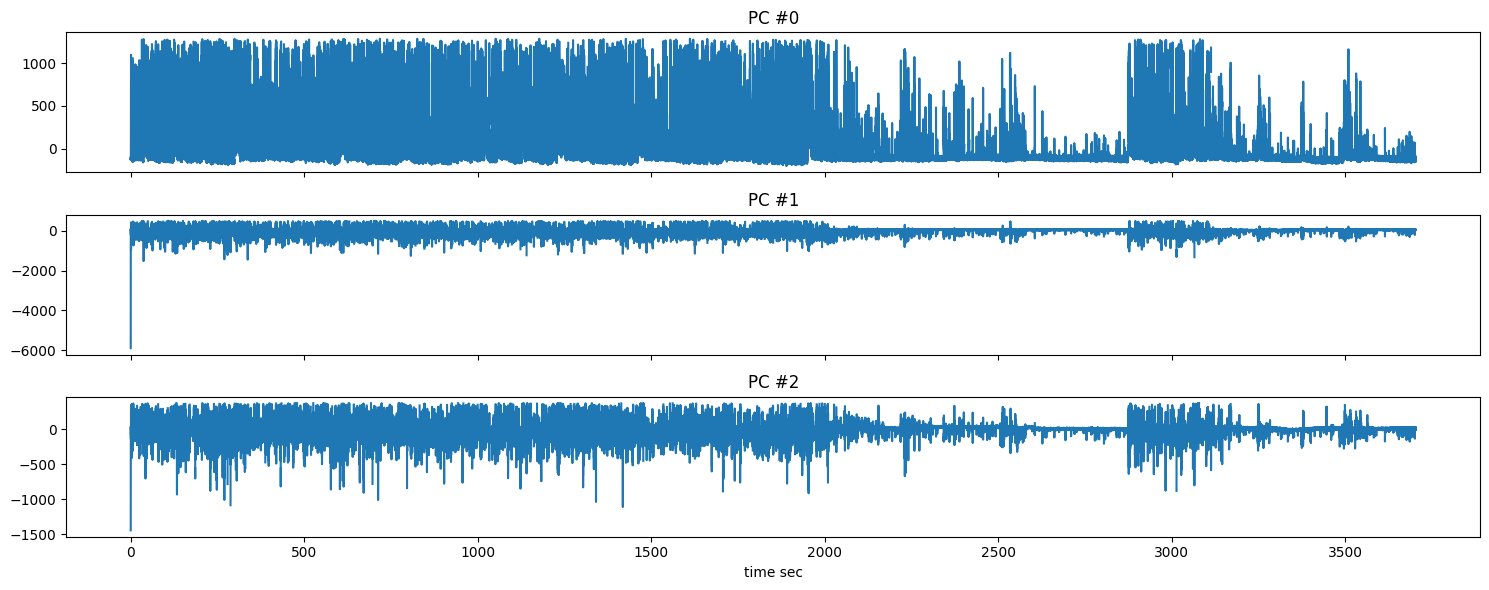

In [19]:
x = utils.get_x_trace_sec(pca_dict['pca_motion_energy'])
fig, axes = plt.subplots(3,1,figsize=(15, 6), sharex=True)
for i, ax in enumerate(axes):
    trace = pca_dict['pca_motion_energy'][:,i]
    trace_filt = utils.remove_outliers_99(trace, percentile = 99)
    ax.plot(x, trace_filt)
    ax.set_title(f"PC #{i}")
ax.set_xlabel('time sec')
plt.tight_layout()
plt.show()


In [46]:
len(x)

222156

In [47]:
len(trace)

222157